# Lab 9: Linear Regression using Scikit-Learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from lib.lab_utils_multi import load_house_data
from lib.lab_utils_common import dlc

from sklearn.linear_model import SGDRegressor # gradient descent regression model
from sklearn.preprocessing import StandardScaler # performs z-score normalization to rescale inputs for faster gradient descent

np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

## Load Data

In [4]:
# load data
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

## Rescale data using Z-Score

In [6]:
# rescale the data using z-score
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


## Create and fit regression model

In [8]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 111, number of weight updates: 10990.0


## View parameters

In [10]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [109.96 -20.93 -32.33 -38.1 ], b:[363.14]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


## Make predictions

In [12]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.14 485.92 389.67 492.08]
Target values 
[300.  509.8 394.  540. ]


## Plot results

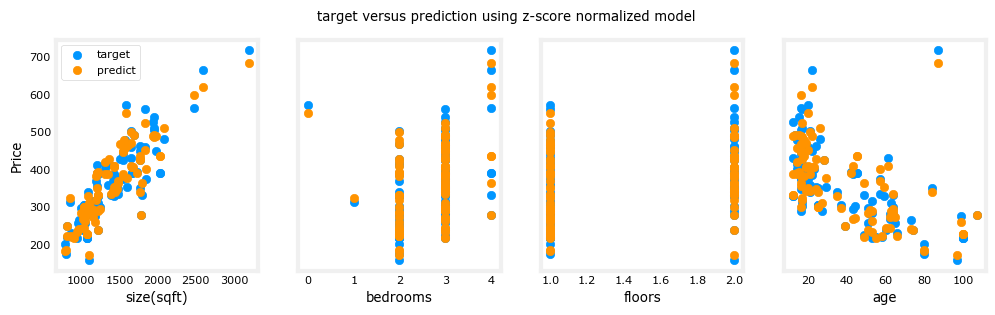

In [14]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()